# Import Libaries

In [2]:
import urllib.request
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from PIL import Image

# PREPROCESSING DATA

In [4]:
TRAINING_DIR = 'data/train'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load training data
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=128, # 128 images per batch 
    class_mode='binary' # binary labels
    )

        
VALIDATION_DIR = 'data/validation'
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Normalize pixel values between 0 and 1

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(150, 150),  # Resize images to 150x150
batch_size=32,
class_mode='binary')

Found 861 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


# DEFINE MODEL

In [20]:
model = tf.keras.models.Sequential([

    #convolution lay16
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #Flatern layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    #output layer
     tf.keras.layers.Dense(1, activation='sigmoid'), # Sigmoid untuk 2 kelas, softmax untuk  multiiclass

])

In [23]:
# lihat arsitektur model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 82944)             0         
                                                                 
 dense_14 (Dense)            (None, 512)              

# COMPILE A MODEL

In [21]:
model.compile(
   loss = "binary_crossentropy",
   optimizer='Adam',
   metrics=['acc']
)


history = model.fit(
    train_generator,
    epochs= 50,
    verbose= 1,
    validation_data=validation_generator,
)

Epoch 1/50
7/7 [==============================] - 20s 3s/step - loss: 4.3593 - acc: 0.5168 - val_loss: 1.1028 - val_acc: 0.5000
Epoch 2/50
7/7 [==============================] - 17s 2s/step - loss: 0.8424 - acc: 0.5273 - val_loss: 0.6982 - val_acc: 0.5000
Epoch 3/50
7/7 [==============================] - 18s 2s/step - loss: 0.6664 - acc: 0.5470 - val_loss: 0.6776 - val_acc: 0.5143
Epoch 4/50
7/7 [==============================] - 18s 3s/step - loss: 0.6172 - acc: 0.6852 - val_loss: 0.6947 - val_acc: 0.5714
Epoch 5/50
7/7 [==============================] - 18s 3s/step - loss: 0.5078 - acc: 0.7933 - val_loss: 0.6358 - val_acc: 0.6286
Epoch 6/50
7/7 [==============================] - 18s 2s/step - loss: 0.4539 - acc: 0.7805 - val_loss: 0.6221 - val_acc: 0.6000
Epoch 7/50
7/7 [==============================] - 18s 3s/step - loss: 0.3932 - acc: 0.9036 - val_loss: 0.6376 - val_acc: 0.6143
Epoch 8/50
7/7 [==============================] - 18s 2s/step - loss: 0.3027 - acc: 0.9257 - val_loss: 0

# PERFORMING ERROR ANALYSIS

<Figure size 640x480 with 0 Axes>

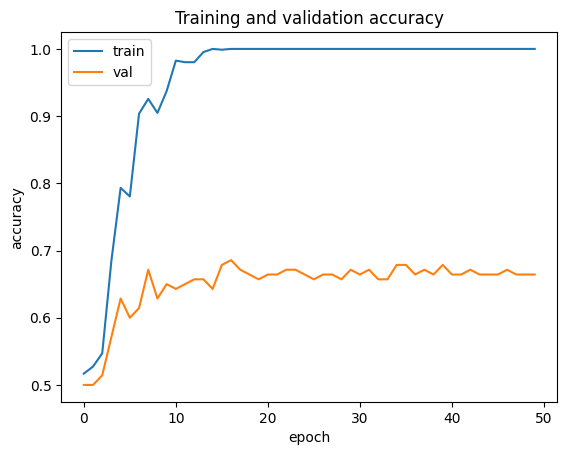

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data sets for each training epoch

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']


# Plot training and validation accuracy per epoch

plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

# Save model

In [24]:
model.save('Klasifikasi_gambar_anjing_dan-kucing.h5')

d:\project\pyton learning\env_prak_ai\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Load model

In [3]:
model = tf.keras.models.load_model('Klasifikasi_gambar_anjing_dan-kucing.h5')

# Menghitung weight

In [8]:
# Hitung total bobot
total_weights = sum([len(layer.numpy().flatten()) for layer in model.trainable_variables])

print(f"Total number of weights in the model: {total_weights}")

Total number of weights in the model: 42487745


# INFERENCE

In [ ]:
from keras.preprocessing import image
import numpy as np

def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    return classes[0][0]

# Upload an image from your local system
def upload_and_predict():
    image_path = input("Enter the file path of the image: ")
    confidence = predict_image_class(image_path)
    if confidence > 0.5:
        print(f"The image is predicted as a anjing")
    else:
        print(f"The image is predicted as a kucing")

# Perform the image upload and prediction
upload_and_predict()

1/1 [==============================] - 0s 93ms/step
The image is predicted as a kucing
